In [1352]:
!pip install yfinance

In [1353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

In [1354]:
yfin.pdr_override()
start='2013-02-15'
end=dt.datetime.now()
df = pdr.get_data_yahoo('BTC-USD', start, end)

[*********************100%%**********************]  1 of 1 completed


In [1355]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [1356]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-06,63776.050781,67637.929688,62848.671875,66106.804688,66106.804688,68750229073
2024-03-07,66099.742188,68029.921875,65655.531250,66925.484375,66925.484375,46989543159
2024-03-08,66938.093750,70083.054688,66230.453125,68300.093750,68300.093750,59202881172
2024-03-09,68299.257812,68673.054688,68053.125000,68498.882812,68498.882812,21609650379
2024-03-10,68467.742188,69996.195312,68393.945312,69894.140625,69894.140625,28165216256


In [1357]:
df=df.reset_index()

In [1358]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [1359]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


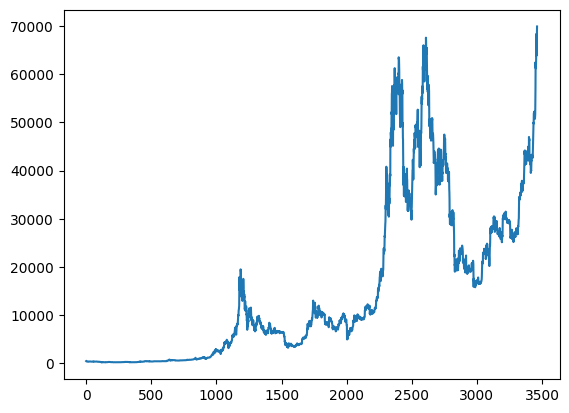

In [1360]:
plt.plot(df.Close)

In [1361]:
ma100=df.Close.rolling(100).mean()

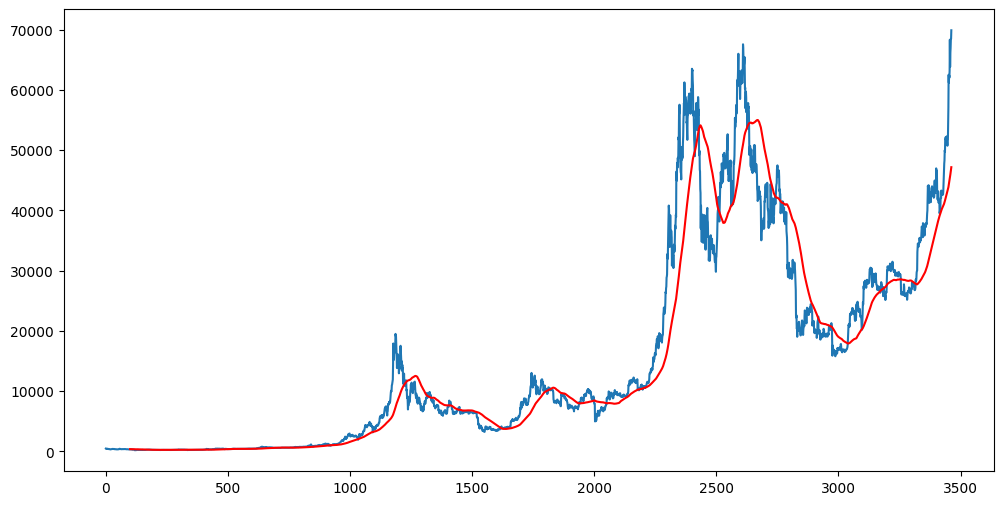

In [1362]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [1363]:
ma200=df.Close.rolling(200).mean()

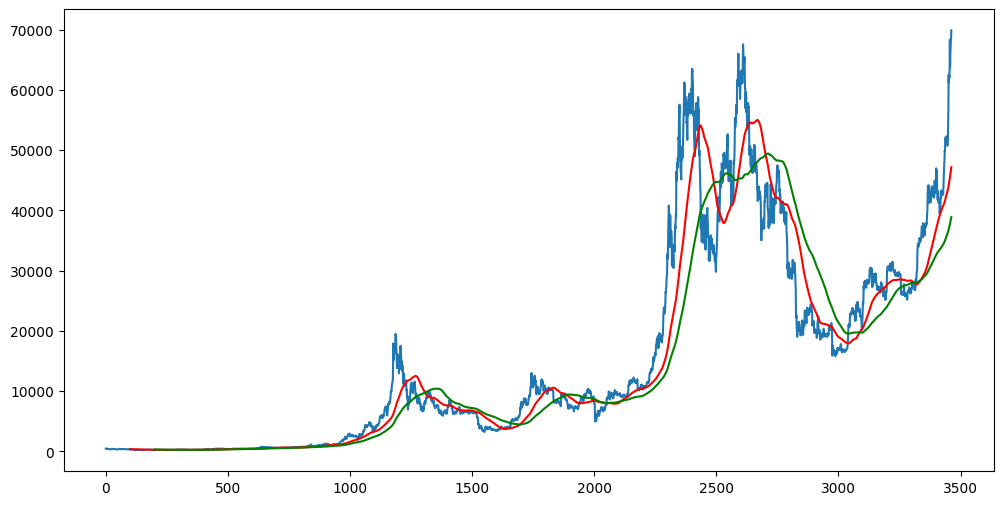

In [1364]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [1365]:
df.shape

(3463, 5)

In [1366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3463 non-null   float64
 1   High    3463 non-null   float64
 2   Low     3463 non-null   float64
 3   Close   3463 non-null   float64
 4   Volume  3463 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 135.4 KB


In [1367]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2770, 1)
(693, 1)


In [1368]:
data_training.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [1369]:
data_testing.tail()

,Close
3458,66106.804688
3459,66925.484375
3460,68300.093750
3461,68498.882812
3462,69894.140625


In [1370]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [1371]:
scaler=RobustScaler()

In [1372]:
data_training_array = scaler.fit_transform(data_training)

In [1373]:
data_training_array

array([[-0.57846644],
       [-0.58165872],
       [-0.5845356 ],
       ...,
       [ 3.31276226],
       [ 3.30024503],
       [ 3.2315809 ]])

In [1374]:
x_train=[]
y_train=[]


for i in range(200,data_training_array.shape[0]):
  x_train.append(data_training_array[i-200:i])
  y_train.append(data_training_array[i,0])


x_train,y_train = np.array(x_train),np.array(y_train)

In [1375]:
y_train

array([-0.59755918, -0.5980547 , -0.59827908, ...,  3.31276226,
        3.30024503,  3.2315809 ])

In [1376]:
y_train.shape

(2570,)

In [1377]:
x_train.shape

(2570, 200, 1)

In [1378]:
import xgboost as xgb
XGB = xgb.XGBRegressor(n_estimators=170,learning_rate=0.08, max_depth=3)
x_train = x_train.reshape(x_train.shape[0], -1)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1379]:
XGB.score(x_train,y_train)

0.9991392177560184

In [1380]:
data_testing.tail()

,Close
3458,66106.804688
3459,66925.484375
3460,68300.093750
3461,68498.882812
3462,69894.140625


In [1381]:

past_200_days=data_training.tail(200)

In [1382]:
past_200_days.tail()

,Close
2765,41166.730469
2766,39935.515625
2767,40553.464844
2768,40424.484375
2769,39716.953125


In [1383]:
final_df=past_200_days.append(data_testing,ignore_index=True)

<ipython-input-1383-fd8b9ca089d8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_200_days.append(data_testing,ignore_index=True)


In [1384]:
final_df

,Close
0,43790.894531
1,48116.941406
2,47711.488281
3,48199.953125
4,49112.902344
...,...
888,66106.804688
889,66925.484375
890,68300.093750
891,68498.882812


In [1385]:
input_data=scaler.fit_transform(final_df)

In [1386]:
input_data.shape

(893, 1)

In [1387]:
x_test=[]
y_test=[]

for i in range(200,input_data.shape[0]):
  x_test.append(input_data[i-200:i])
  y_test.append(input_data[i,0])


x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(693, 200, 1)
(693,)


In [1388]:
x_test.shape

(693, 200, 1)

In [1389]:
x_test = x_test.reshape(x_test.shape[0], -1)

In [1390]:
XGB.score(x_test,y_test)

0.9754577997427626

In [1391]:
y_pred = XGB.predict(x_test)

In [1392]:
y_pred =y_pred.reshape(-1, 1)

In [1393]:
y_pred=scaler.inverse_transform(y_pred)

In [1394]:
y_test=np.array(y_test)

In [1395]:
y_test=y_test.reshape(y_test.shape[0],1)

In [1396]:
y_test.shape

(693, 1)

In [1397]:
y_test=scaler.inverse_transform(y_test)

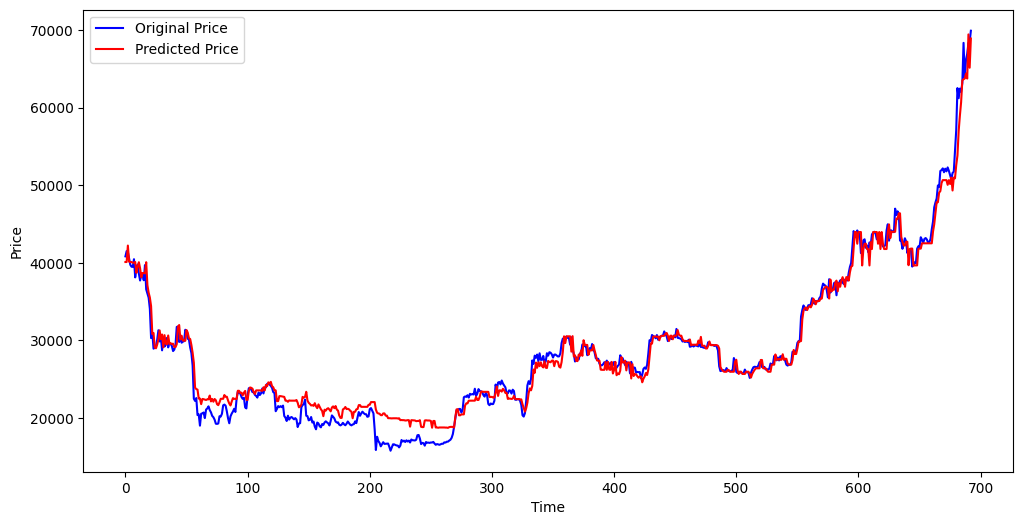

In [1398]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1399]:
y_predicted=XGB.predict(x_train)

In [1400]:
y_train

array([-0.59755918, -0.5980547 , -0.59827908, ...,  3.31276226,
        3.30024503,  3.2315809 ])

In [1401]:
y_train=np.array(y_train)
y_train=y_train.reshape(y_train.shape[0],1)
y_train=scaler.inverse_transform(y_train)

In [1402]:
y_train

array([[17818.72255565],
       [17809.2289369 ],
       [17804.93018811],
       ...,
       [92735.69258683],
       [92495.87778418],
       [91180.35715749]])

In [1403]:
y_predicted =y_predicted.reshape(-1, 1)

In [1404]:
y_predicted=scaler.inverse_transform(y_predicted)

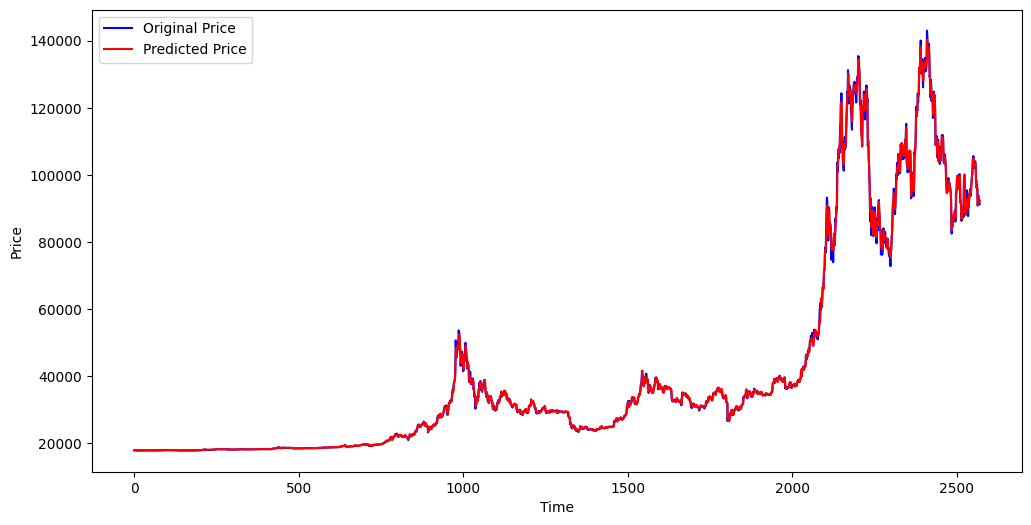

In [1405]:
plt.figure(figsize=(12,6))
plt.plot(y_train,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1406]:
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,y_predicted)))
print("Train data MSE: ", mean_squared_error(y_train,y_predicted))
print("Train data MAE: ", mean_absolute_error(y_train,y_predicted))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))
print("Test data MSE: ", mean_squared_error(y_test,y_pred))
print("Test data MAE: ", mean_absolute_error(y_test,y_pred))

Train data RMSE:  917.2480763202965
Train data MSE:  841344.0335132844
Train data MAE:  481.14520360579377
-------------------------------------------------------------------------------------
Test data RMSE:  1530.7289112986161
Test data MSE:  2343130.9998854464
Test data MAE:  1123.982013212482


In [1407]:
print("Train data R2 score:", r2_score(y_train, y_predicted))
print("Test data R2 score:", r2_score(y_test, y_pred))

Train data R2 score: 0.9991392178495577
Test data R2 score: 0.9754577997861515


In [1408]:
input_data.shape

(893, 1)

In [1409]:
x_test2=[]
x_test2.append(input_data[input_data.shape[0]-200:input_data.shape[0]])
x_test2=np.array(x_test2)
x_test2.shape

(1, 200, 1)

In [1410]:
input_data.shape

(893, 1)

In [1411]:
inputt=input_data
inputt.shape

(893, 1)

In [1412]:
x_test2=[]
y_predicted_new=[]

inputtt=input_data

for i in range(7):
  x_test2.append(inputtt[inputtt.shape[0]-200-2:inputtt.shape[0]-2])
  x_test2=np.array(x_test2)
  x_test2=np.reshape(x_test2, (1, x_test2.shape[1]))
  # x_test2 = x_test2.reshape(x_test.shape[0], -1)
  y_temp=XGB.predict(x_test2)
  print(y_temp)
  x_test2 = []
  y_predicted_new.append(y_temp)
  # inputtt.append(np.array(y_temp[0]))
  inputtt=np.append(inputtt, [np.array(y_temp)], axis=0)


print(np.array(x_test2).shape)


[1.8718036]
[2.0681052]
[2.2573035]
[2.2549016]
[2.4097533]
[2.4293091]
[2.2562668]
(0,)


In [1413]:
y_predicted_new=np.array(y_predicted_new)
y_predicted_new

array([[1.8718036],
       [2.0681052],
       [2.2573035],
       [2.2549016],
       [2.4097533],
       [2.4293091],
       [2.2562668]], dtype=float32)

In [1414]:
y_predicted_new =y_predicted_new.reshape(-1, 1)

In [1415]:
y_predicted_new=scaler.inverse_transform(y_predicted_new)

In [1416]:

y_predicted_new

array([[65128.688],
       [68889.586],
       [72514.4  ],
       [72468.375],
       [75435.15 ],
       [75809.81 ],
       [72494.53 ]], dtype=float32)

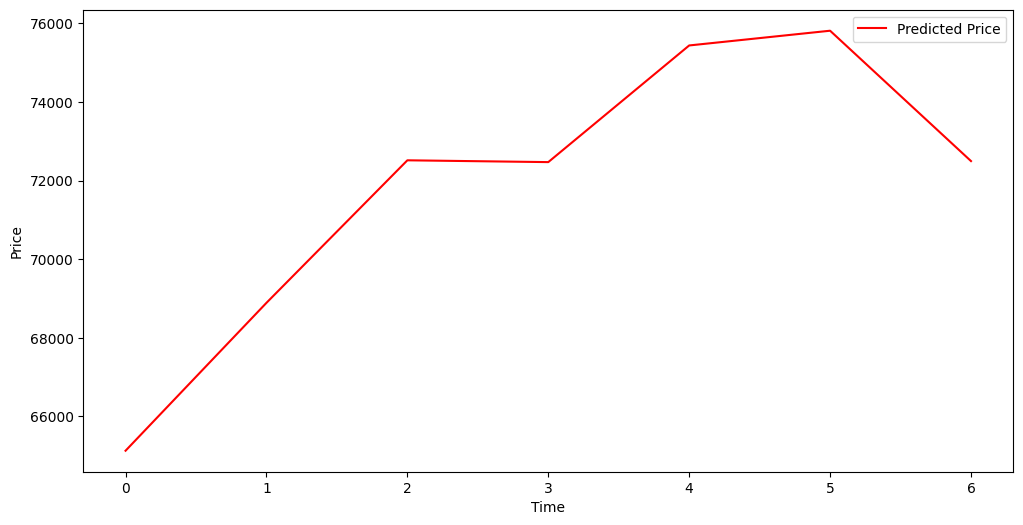

In [1417]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted_new,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

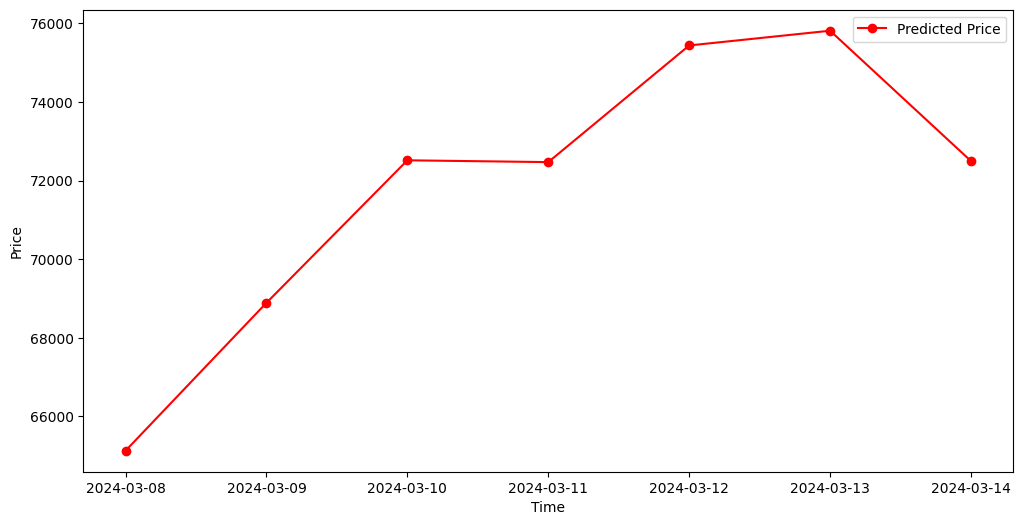

In [1418]:
today = dt.date.today()

dates = [today - dt.timedelta(days=i) for i in range(2, -5, -1)]


plt.figure(figsize=(12, 6))
plt.plot(dates, y_predicted_new, 'r', marker='o', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()


plt.show()

In [1419]:
# import pickle
# with open('xgb_model.pkl', 'wb') as model_file:
#     pickle.dump(XGB,model_file)
